In [92]:
## Importing libraries 

import numpy as np
from numpy import random

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

### Reading the dataframe

In [93]:
df = pd.DataFrame(pd.read_csv("Houseprice_Regression.csv"))

In [94]:
df.head(100)

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   7129300520  10/13/2014         3       1.00         1180      5650   
1   6414100192   12/9/2014         3       2.25         2570      7242   
2   5631500400   2/25/2015         2       1.00          770     10000   
3   2487200875   12/9/2014         4       3.00         1960      5000   
4   1954400510   2/18/2015         3       2.00         1680      8080   
..         ...         ...       ...        ...          ...       ...   
95  1483300570    9/8/2014         4       2.50         3300     10250   
96  3422049190   3/30/2015         3       1.75         1960     15681   
97  1099611230   9/12/2014         4       1.50         1160      6400   
98   722079104   7/11/2014         3       1.75         1810     41800   
99  7338200240   5/16/2014         3       2.50         2320     36847   

    floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0      1.0           0     0          3  ...        1180              0   
1      2.0           0     0          3  ...        2170            400   
2      1.0           0     0          3  ...         770              0   
3      1.0           0     0          5  ...        1050            910   
4      1.0           0     0          3  ...        1680              0   
..     ...         ...   ...        ...  ...         ...            ...   
95     1.0           0     0          3  ...        2390            910   
96     1.0           0     0          3  ...        1960              0   
97     1.0           0     0          4  ...        1160              0   
98     1.0           0     0          5  ...        1210            600   
99     2.0           0     2          3  ...        2320              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955             0    98178  47.5112 -122.257           1340   
1       1951          1991    98125  47.7210 -122.319           1690   
2       1933             0    98028  47.7379 -122.233           2720   
3       1965             0    98136  47.5208 -122.393           1360   
4       1987             0    98074  47.6168 -122.045           1800   
..       ...           ...      ...      ...      ...            ...   
95      1946          1991    98040  47.5873 -122.249           1950   
96      1967             0    98032  47.3576 -122.277           1750   
97      1975             0    98023  47.3036 -122.378           1160   
98      1980             0    98038  47.4109 -121.958           1650   
99      1992             0    98045  47.4838 -121.714           2550   

    sqft_lot15   price  
0         5650  221900  
1         7639  538000  
2         8062  180000  
3         5000  604000  
4         7503  510000  
..         ...     ...  
95        6045  905000  
96       15616  247500  
97        6400  199000  
98      135036  314000  
99       35065  437500  

[100 rows x 21 columns]

### Initial findings from the Analysis

* Column headers are perfect(no need for cleaning)
* the date has no significant importance

### Identifying the datatypes

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [97]:
df.shape

(21597, 21)

In [98]:
### date column should be dropped 
df = df.drop('date',axis=1)

### Filtering the null values

In [99]:
df.isnull().sum()*100/df.shape[0]

id               0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

### Initial Plotting

In [116]:
def plot(dataframe):
    for i in df.describe().columns:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.title(i)
        sns.distplot(df[i])
        plt.subplot(1,2,2)
        plt.title(i)
        sns.boxplot(y=df[i])
        plt.show();

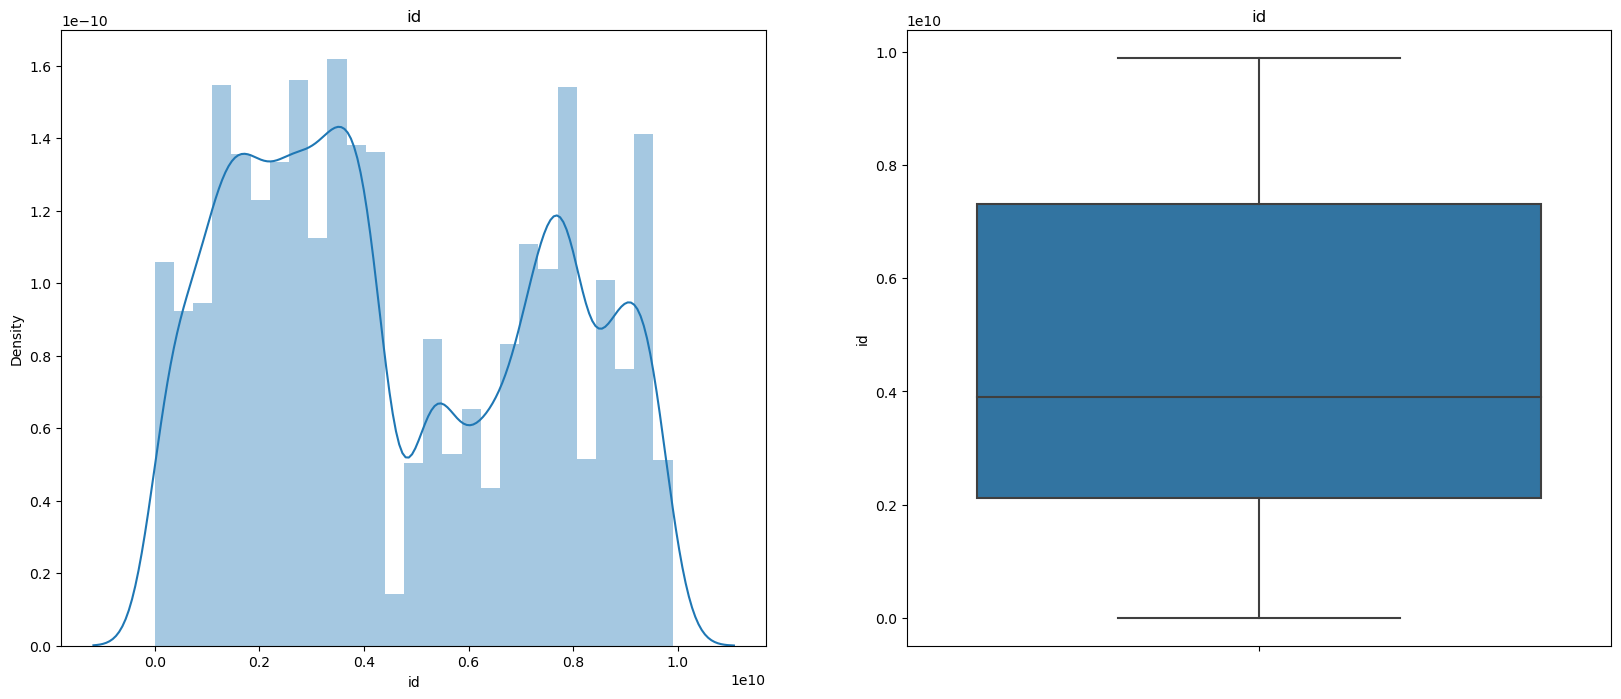

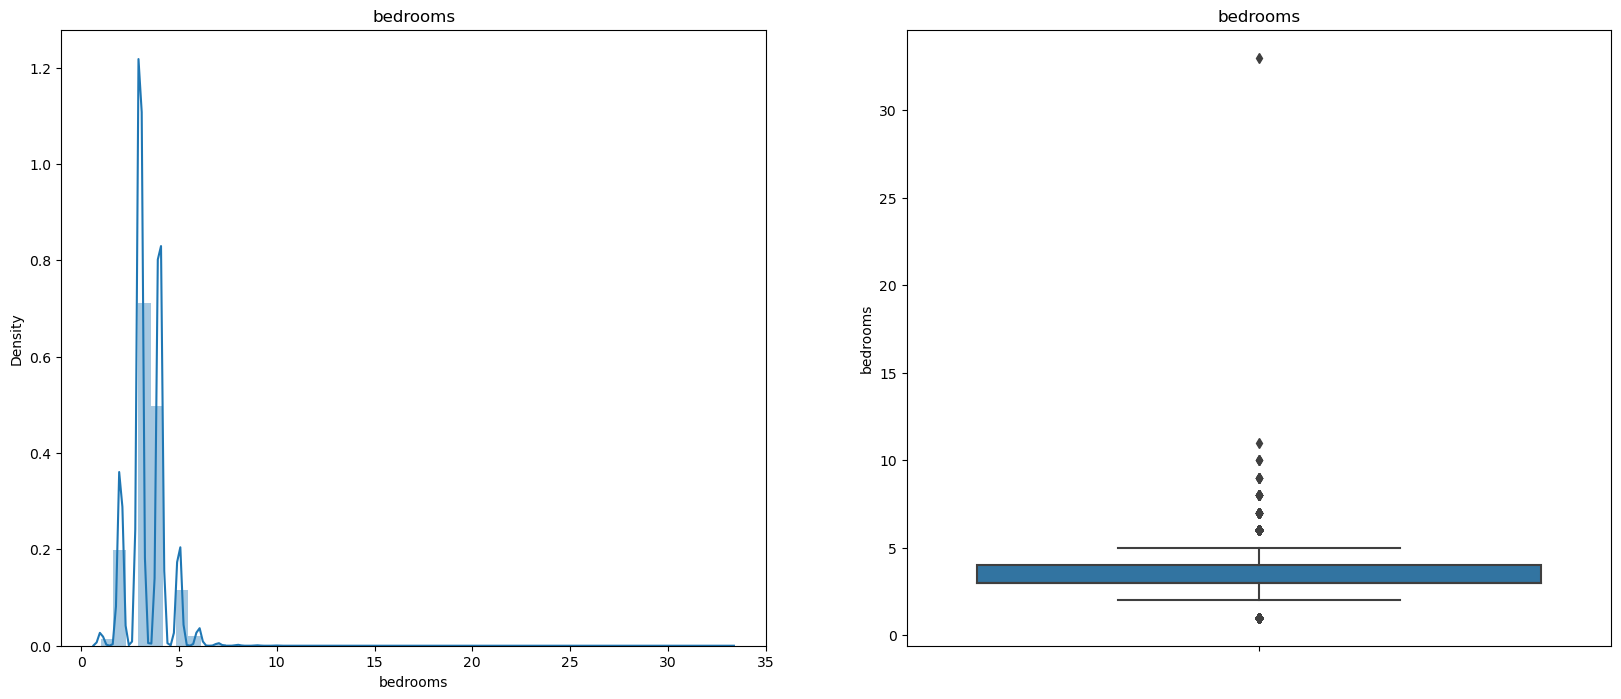

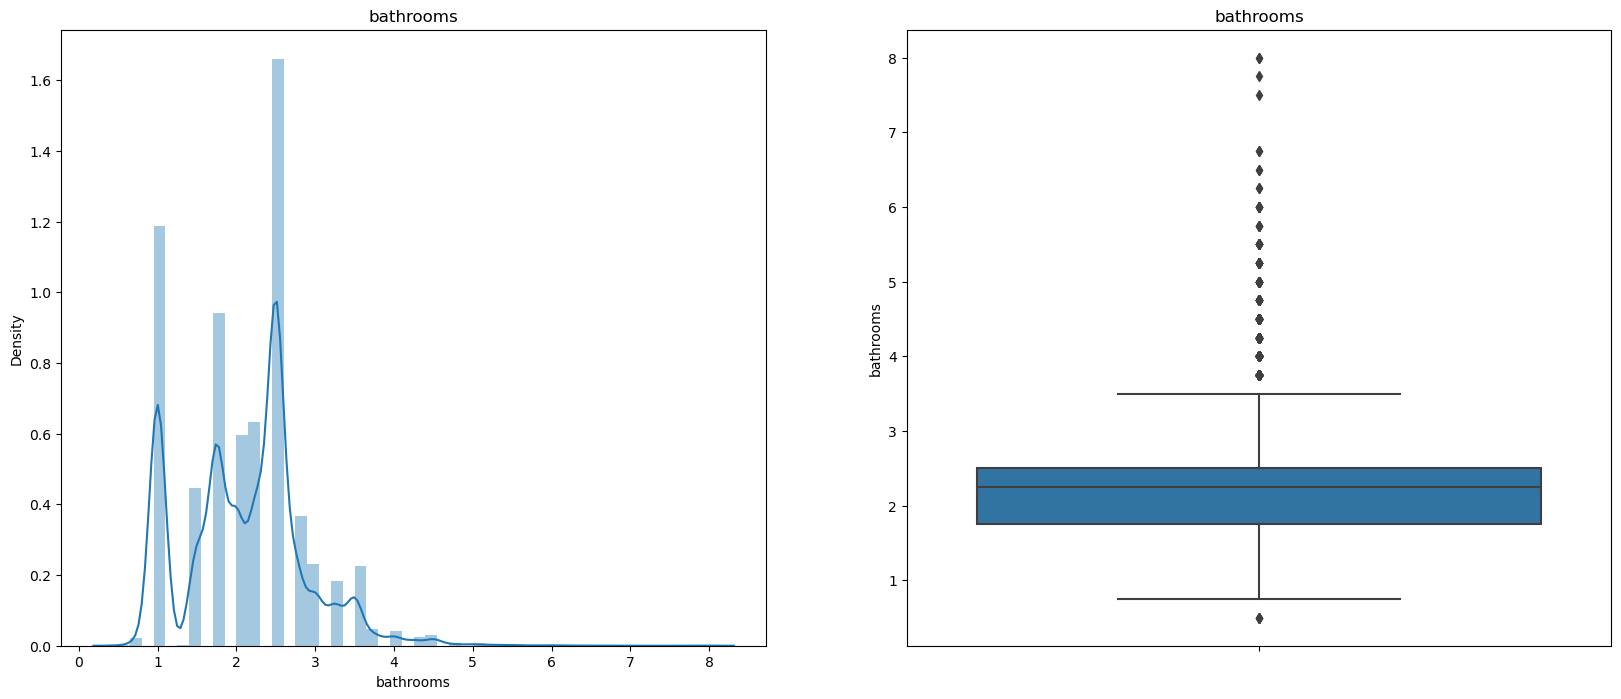

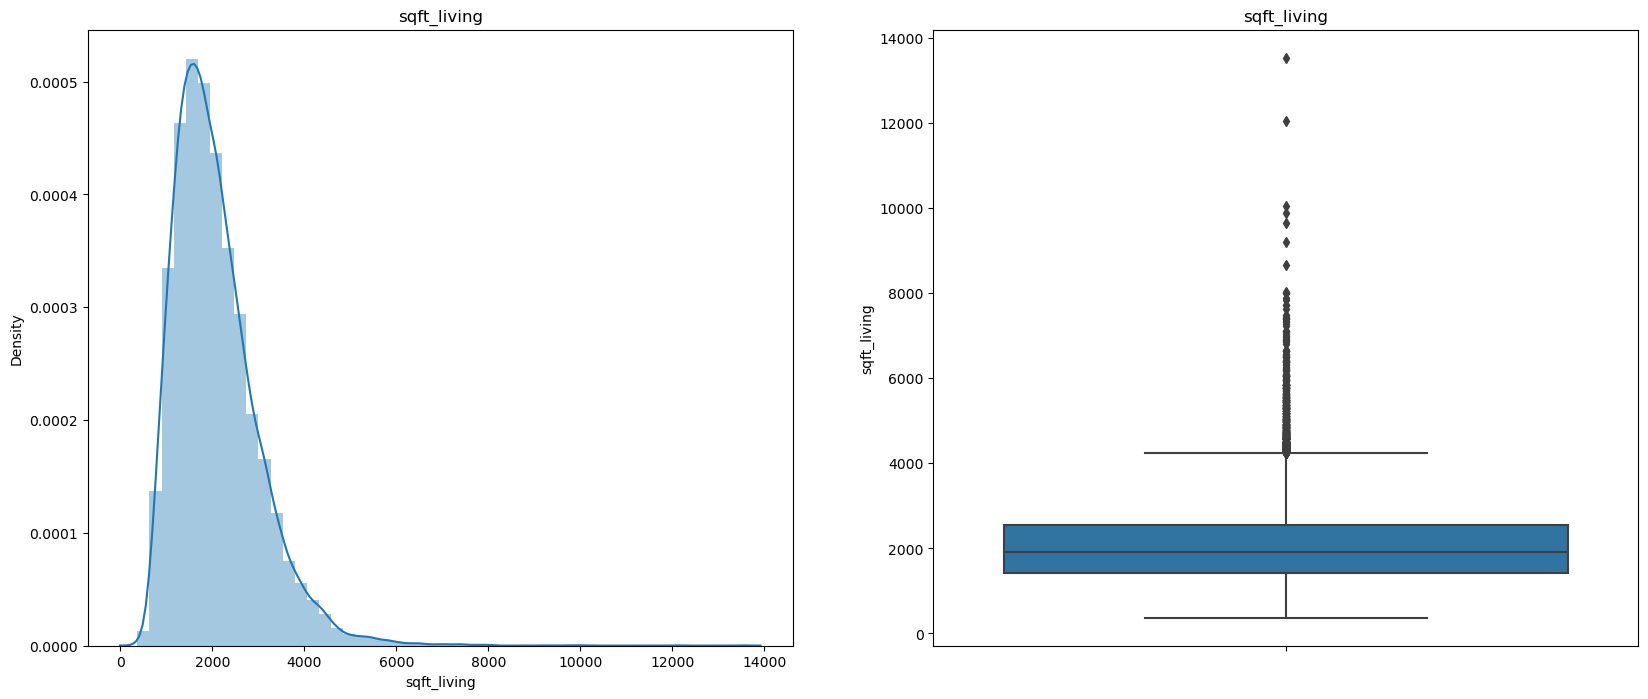

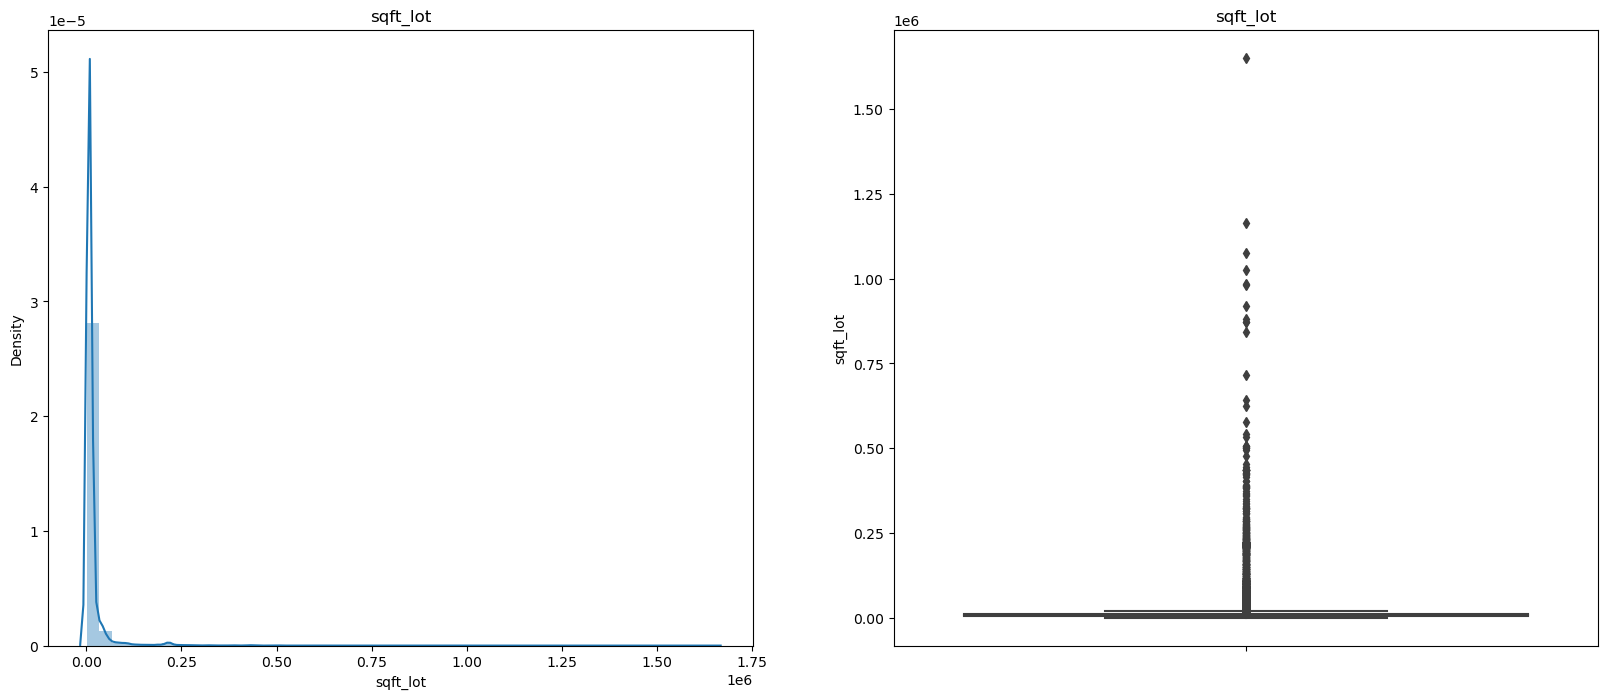

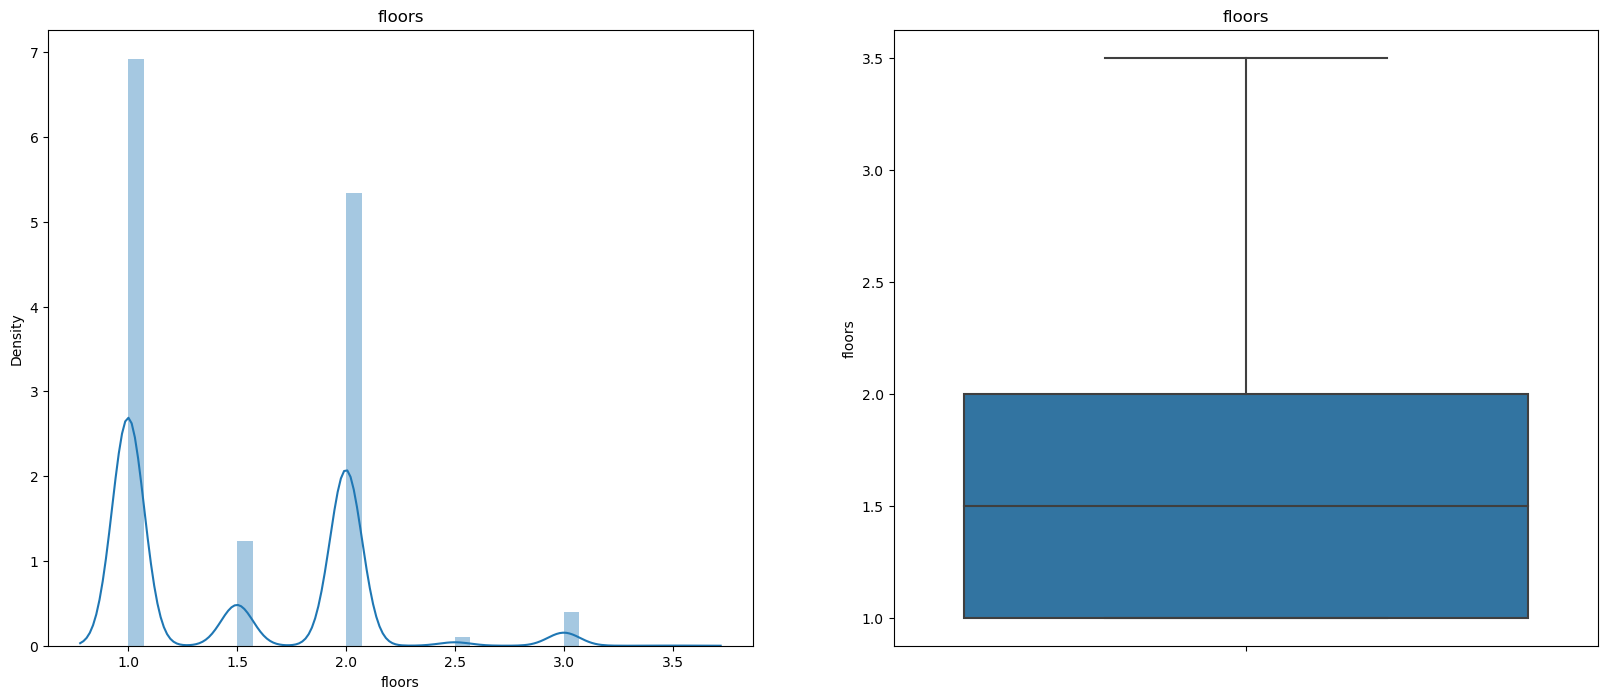

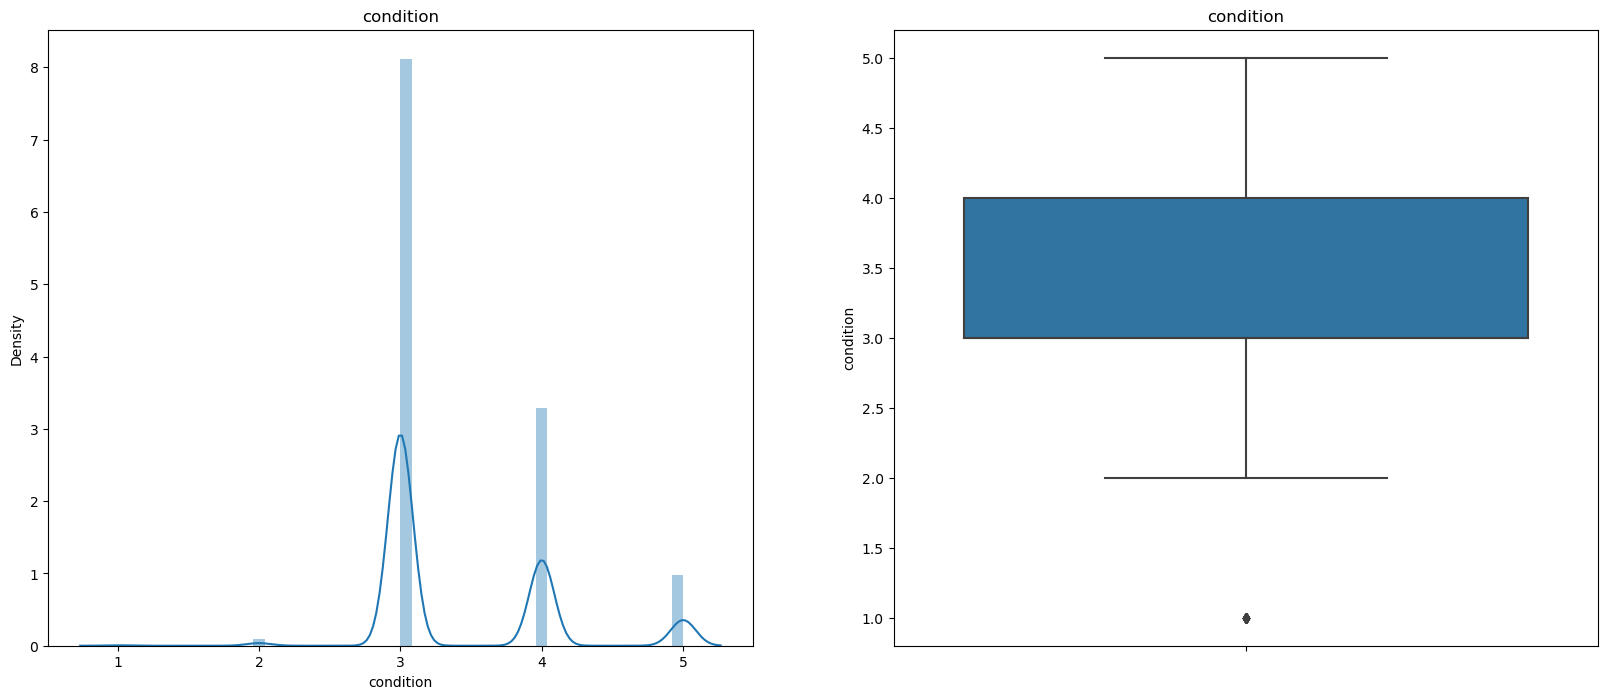

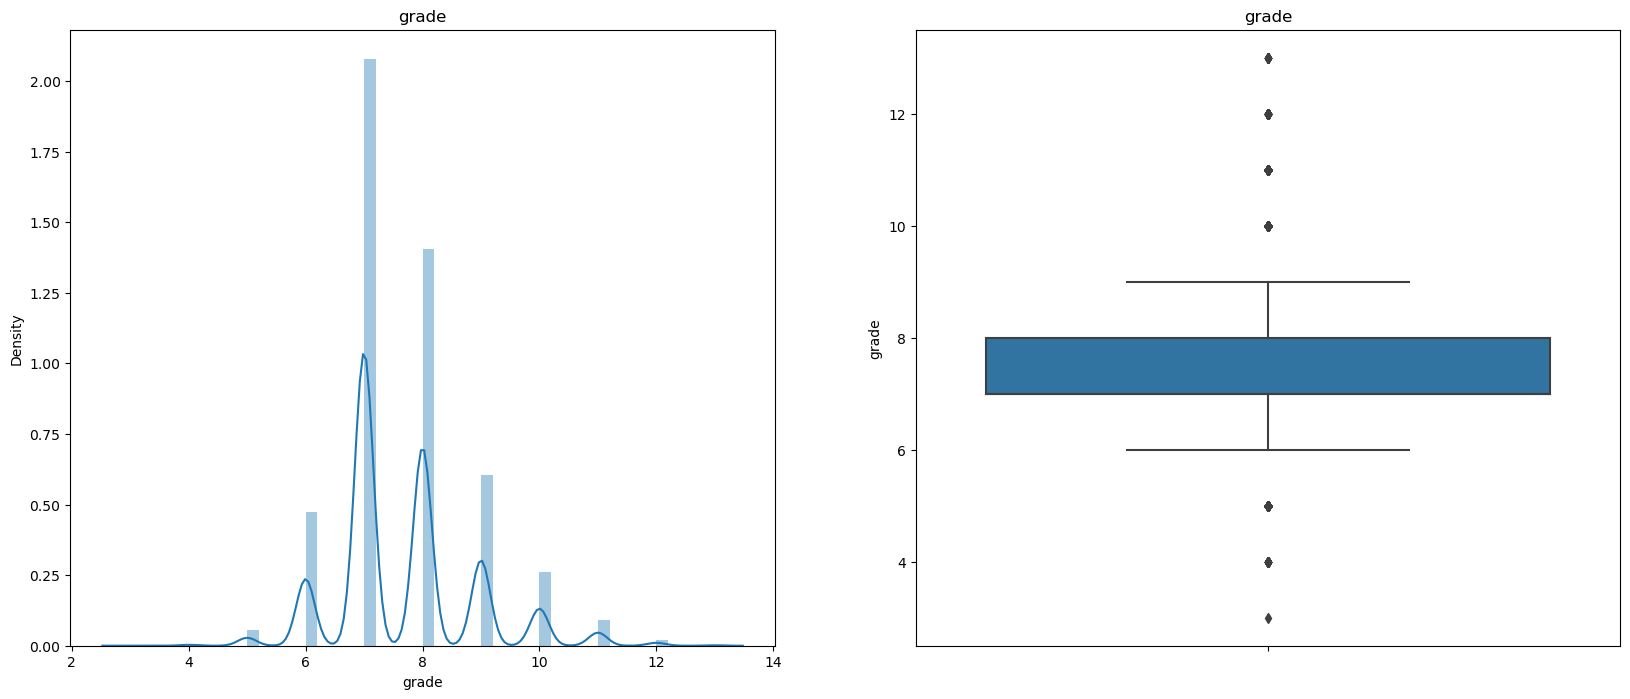

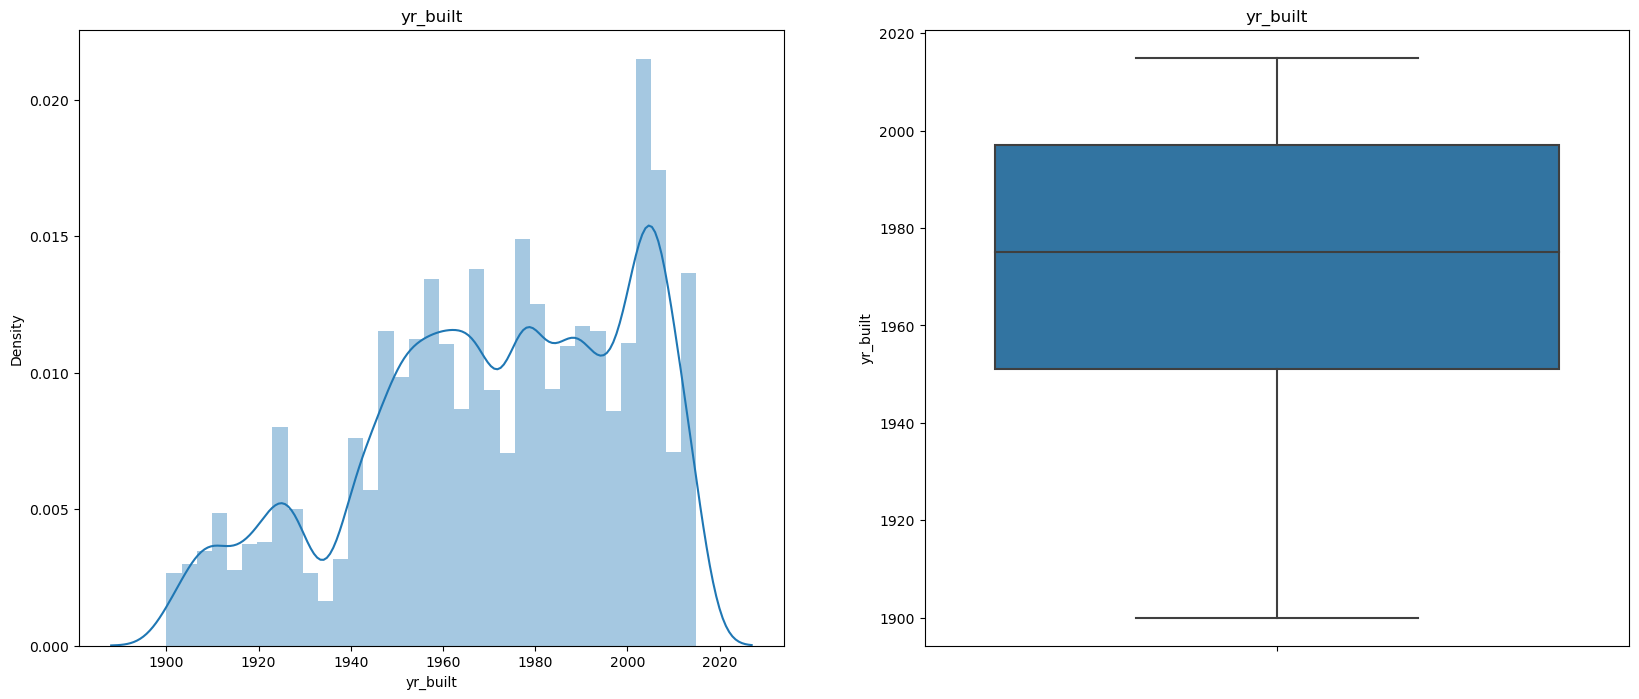

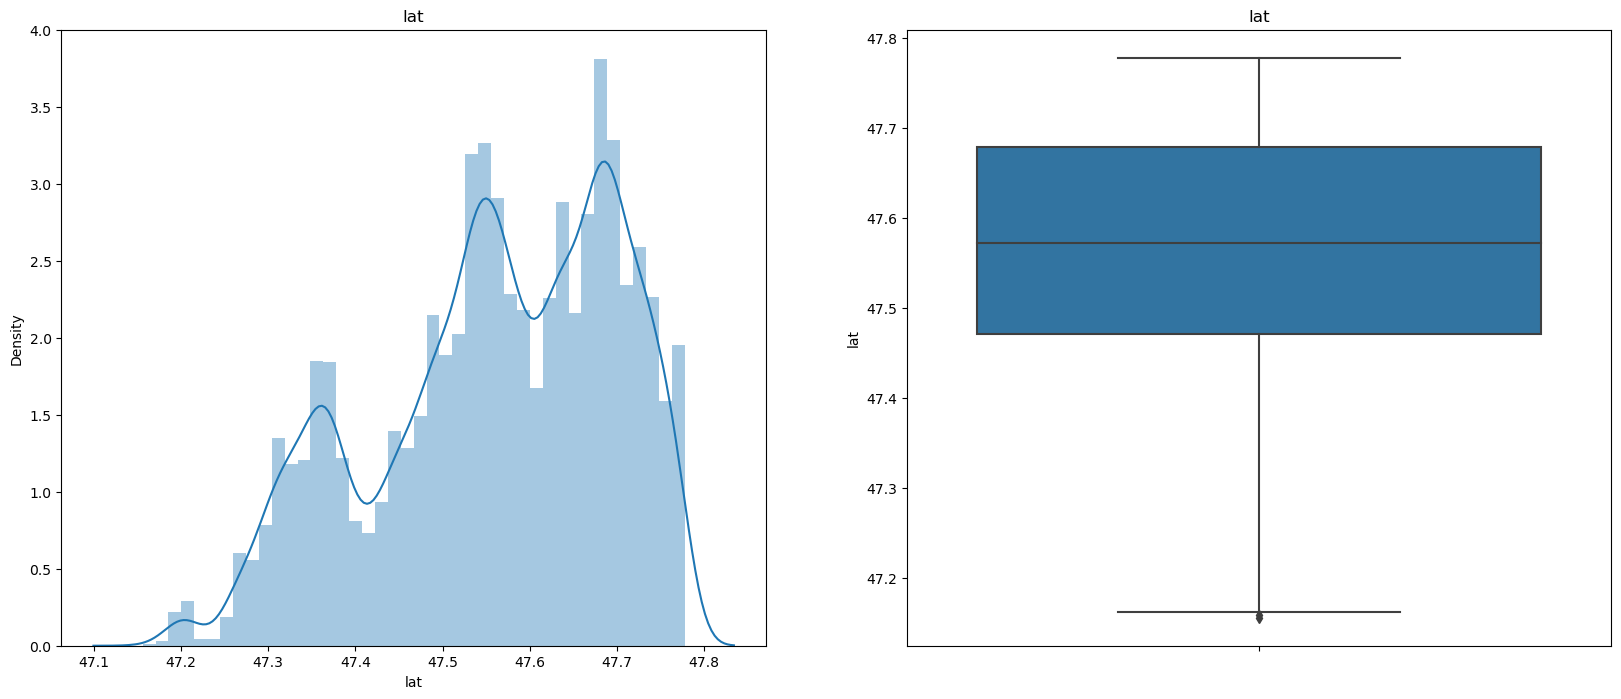

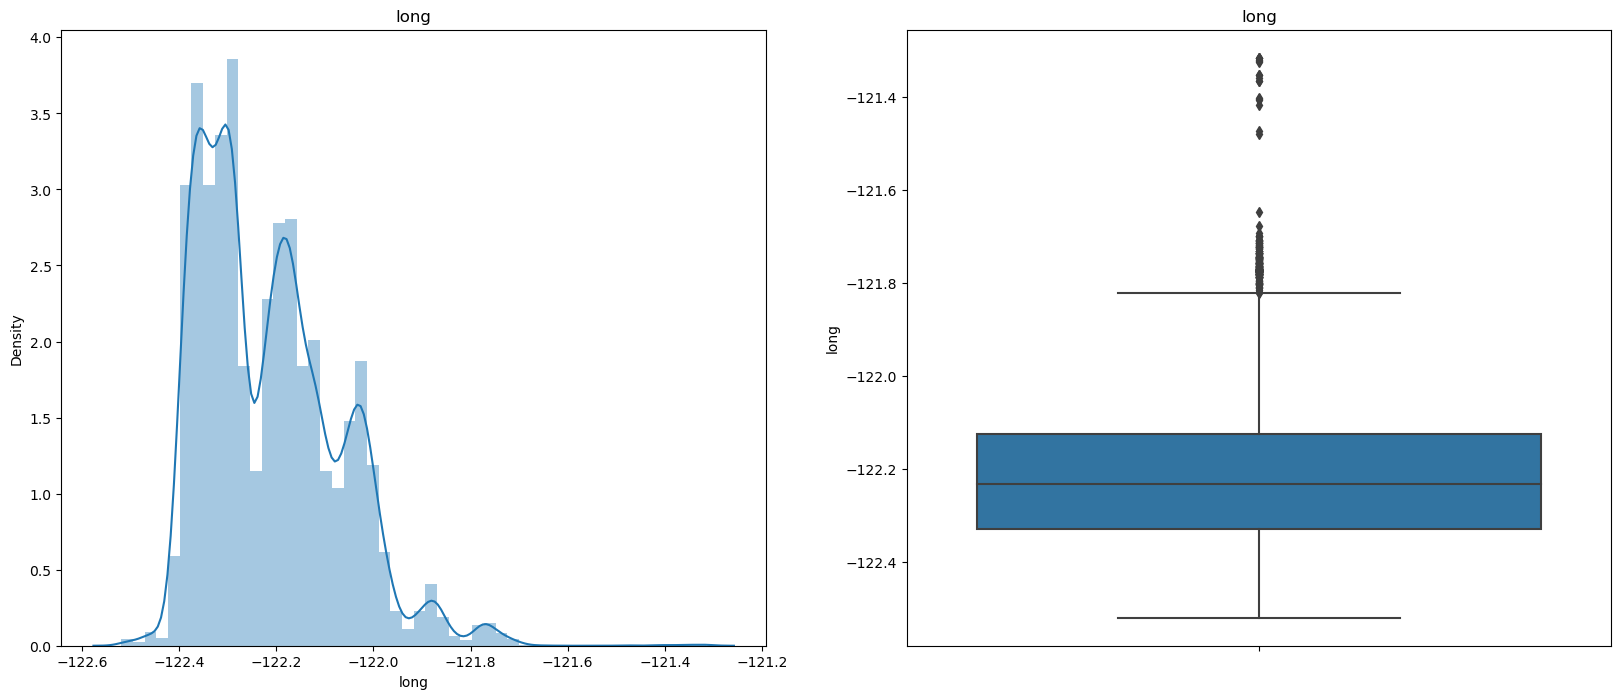

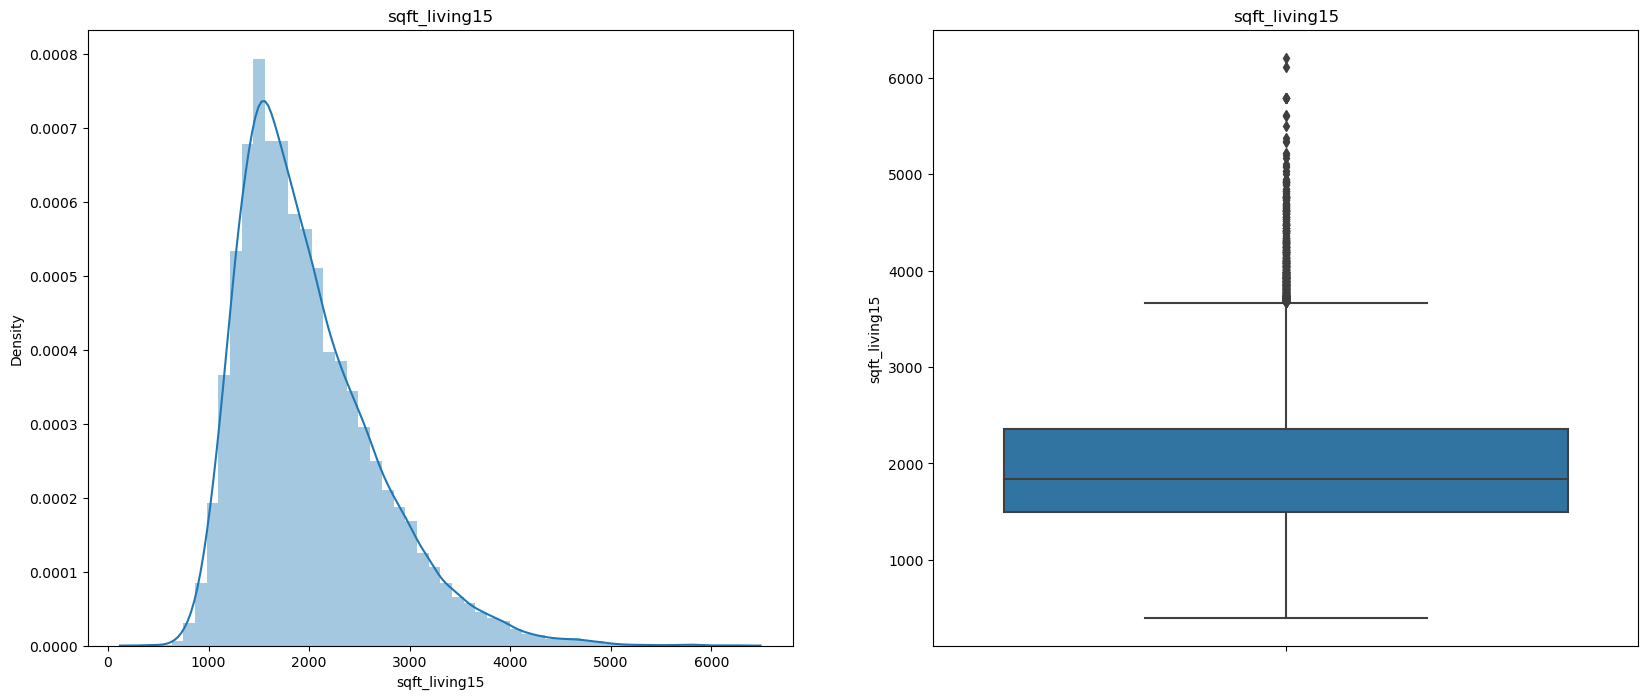

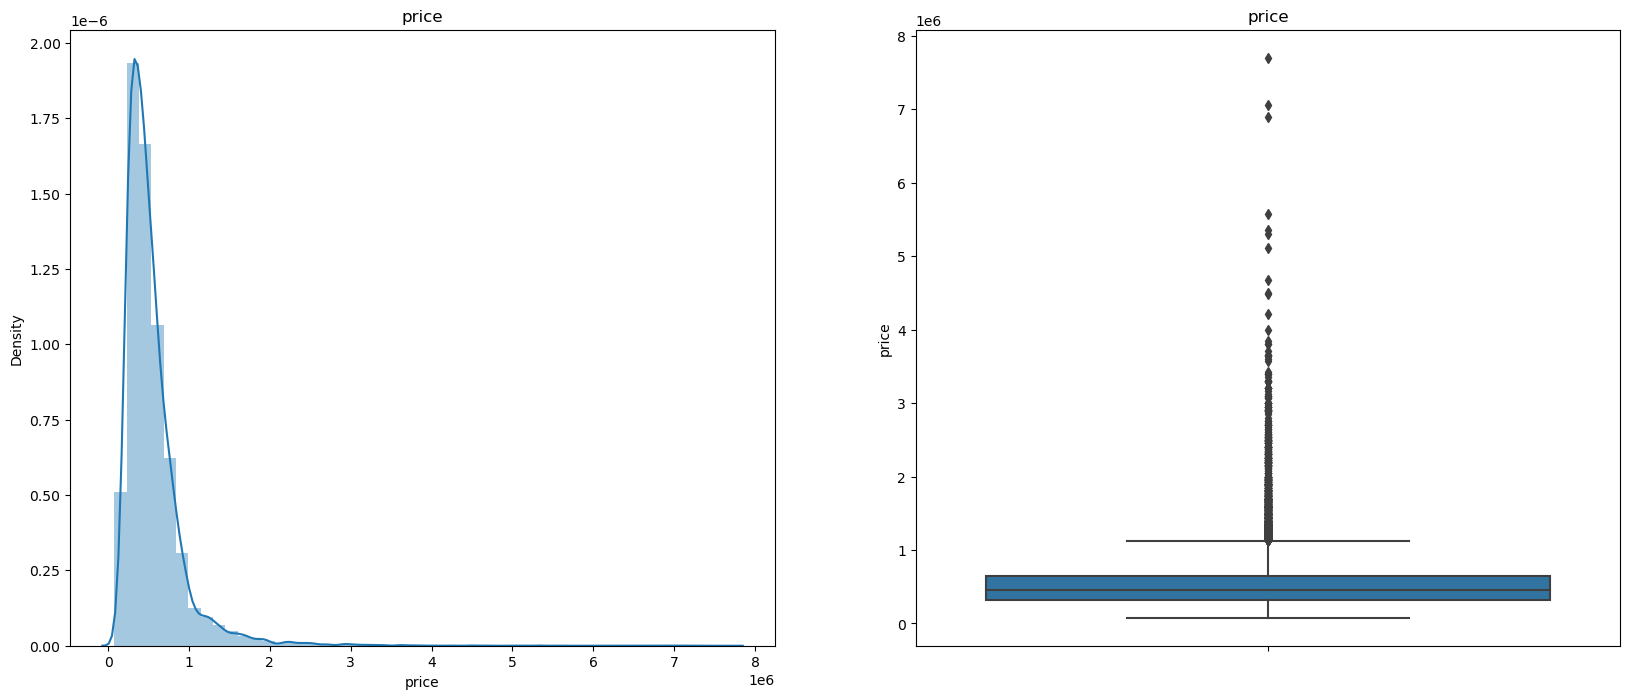

In [117]:
plot(df)

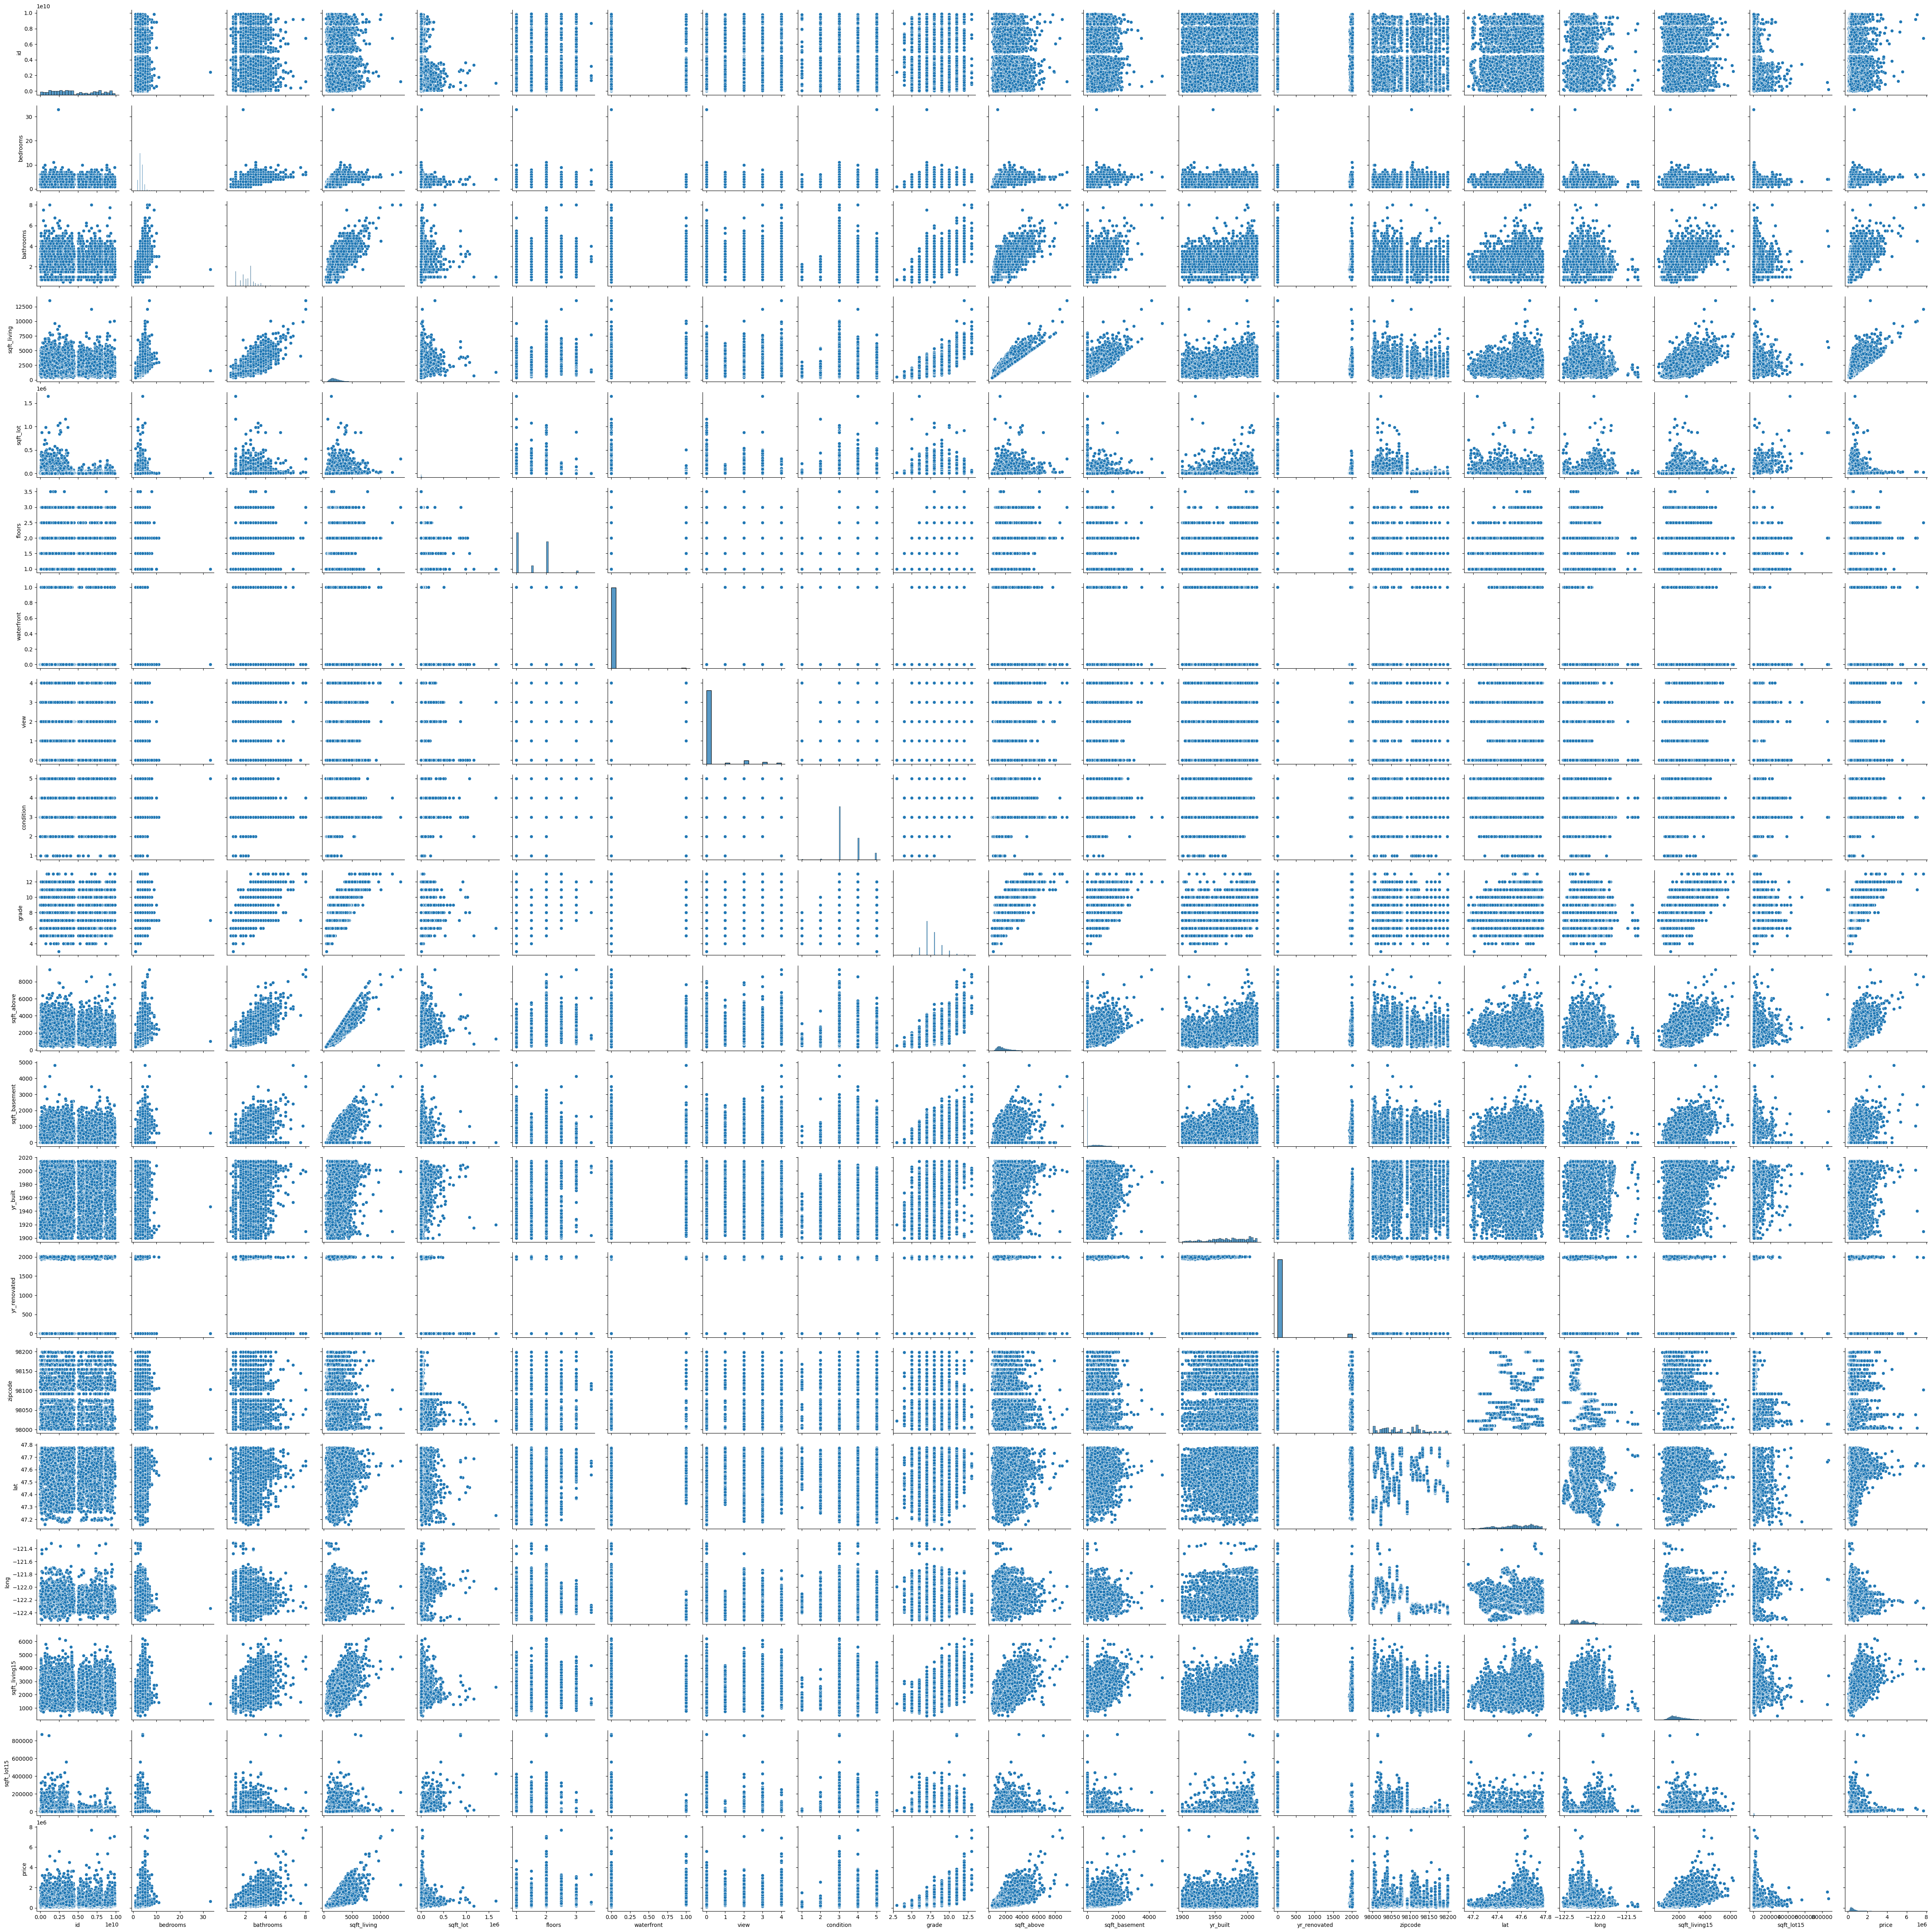

In [100]:
sns.pairplot(df)
plt.show()

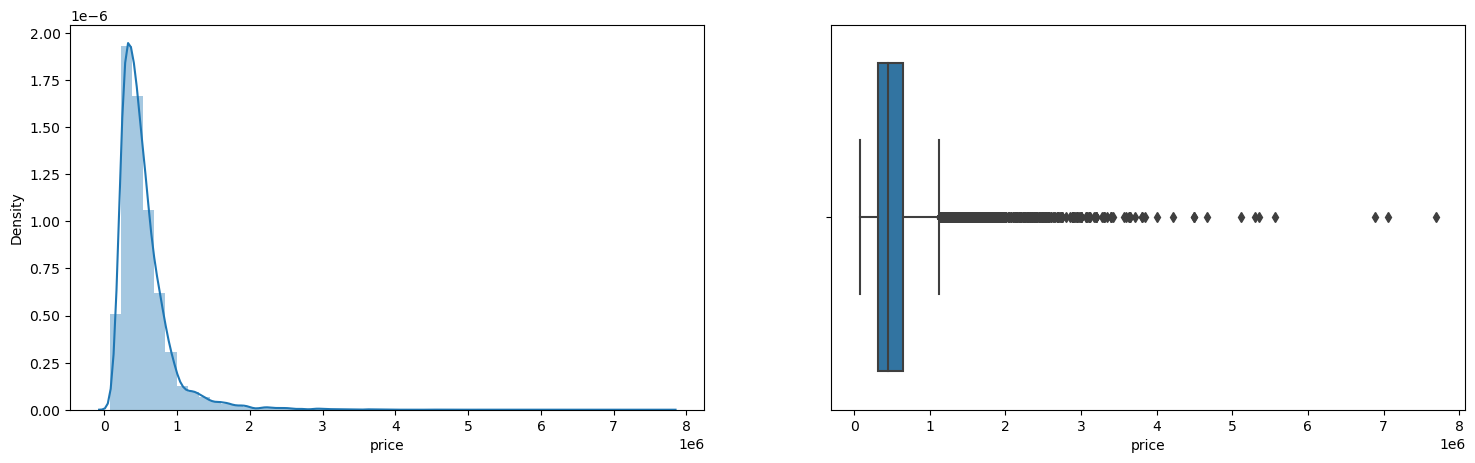

In [115]:
plt.rcParams['figure.figsize'] = 18,5
fig,ax= plt.subplots(1,2)
sns.distplot(df['price'],ax=ax[0])
sns.boxplot(df['price'],ax=ax[1])
plt.show()

### Observation: The variable 'price' has significant outliers

### Calculation of skewness

In [101]:
from scipy.stats import skew

pr = skew(df['price'].values)                              
sl = skew(df['sqft_living'].values)                      
sl_15 = skew(df['sqft_living15'].values)
Bath = skew(df['bathrooms'].values)
bed = skew(df['bedrooms'].values)
gra = skew(df['grade'].values)
fl = skew(df['floors'].values)
lat = skew(df['lat'].values)


print('price: ', pr, '  sqft_living: ', sl, ' sqft_living15: ', sl_15, ' bathrooms: ',Bath, '  bedrooms:',bed, ' grade: ', gra, ' floors: ', fl, ' lat: ', lat)

price:  4.023085207745834   sqft_living:  1.4731131326116373  sqft_living15:  1.1067985186085634  bathrooms:  0.5196731850083088   bedrooms: 2.0235006824707016  grade:  0.7881818890694129  floors:  0.6144542954741122  lat:  -0.48548786789103476


### Observation: 'Price' Variable is highly skewed

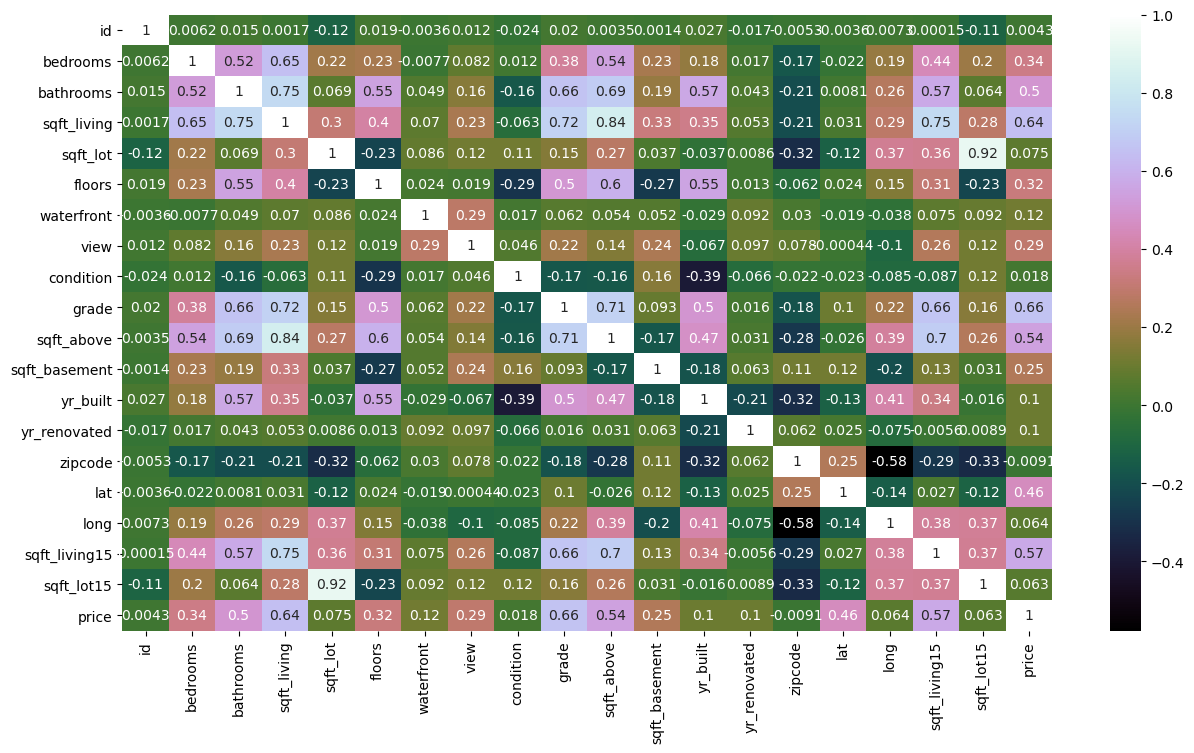

In [102]:
plt.rcParams['figure.figsize'] = 15,8
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='cubehelix')
plt.show()

### Data Cleaning

### We are further dropping columns which is not significant to correlations

In [103]:
df.drop(columns = ['waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_lot15', 'zipcode',], inplace = True)
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  7129300520         3       1.00         1180      5650     1.0          3   
1  6414100192         3       2.25         2570      7242     2.0          3   
2  5631500400         2       1.00          770     10000     1.0          3   
3  2487200875         4       3.00         1960      5000     1.0          5   
4  1954400510         3       2.00         1680      8080     1.0          3   

   grade  yr_built      lat     long  sqft_living15   price  
0      7      1955  47.5112 -122.257           1340  221900  
1      7      1951  47.7210 -122.319           1690  538000  
2      6      1933  47.7379 -122.233           2720  180000  
3      7      1965  47.5208 -122.393           1360  604000  
4      8      1987  47.6168 -122.045           1800  510000

In [104]:
### removing the significant outliers

IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)                                                                      
outlier_threshhold = IQR*1.5 + df['price'].quantile(0.75)         
df_IQR = df[df['price'] <= outlier_threshhold]

df_outlier = df[df['price']  >= outlier_threshhold]                            
outlier_outlier_threshhold = df_outlier['price'].quantile(0.75)

df_transform= df[df['price'] <= outlier_outlier_threshhold]      
len(df_transform)

# Removing other significant outliers

df_transform = df_transform[df_transform['bedrooms'] < 12]
df_transform = df_transform[df_transform['bathrooms'] < 7.50] 
df_transform = df_transform[df_transform['long'] < -121.6] 

### Correlation after removing outliers and data cleaning

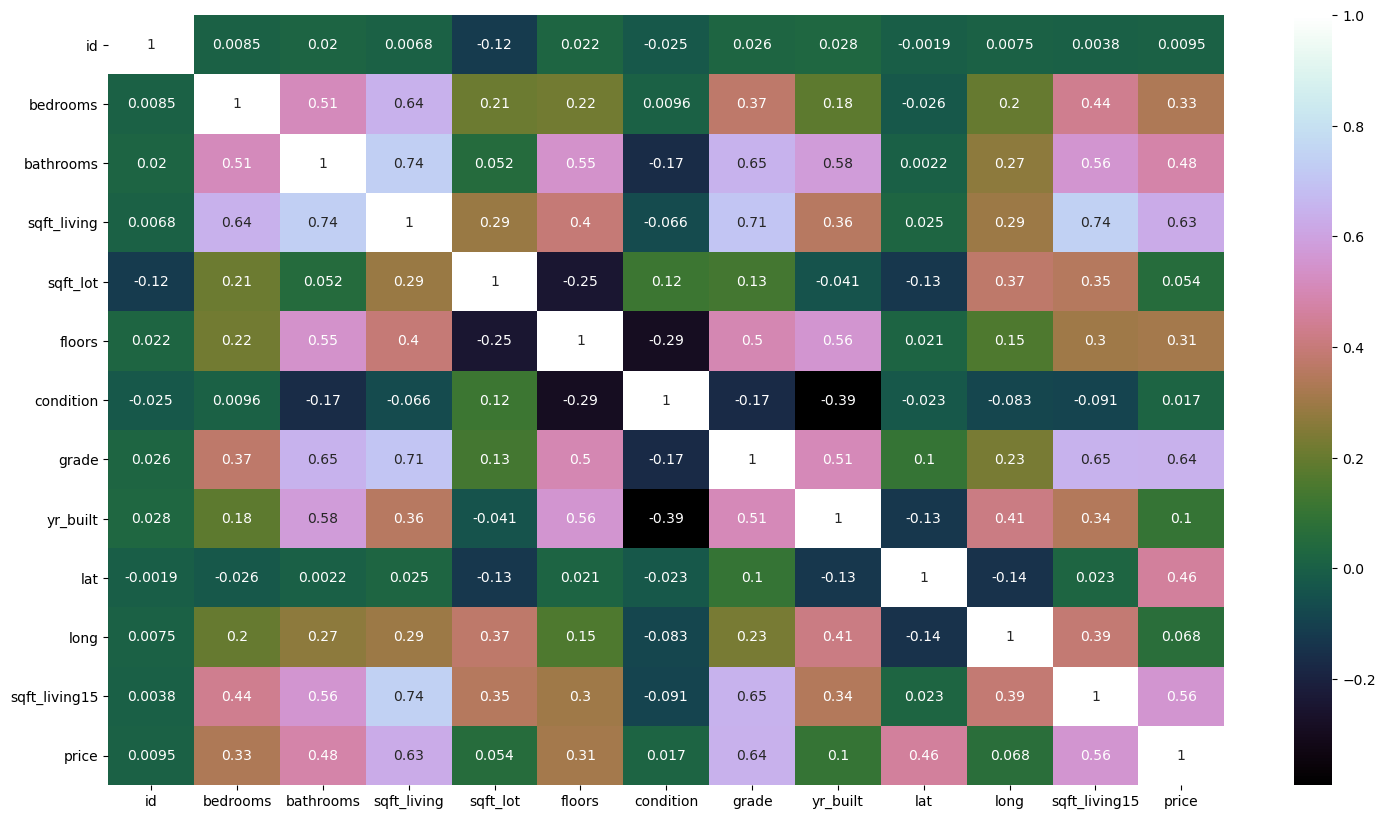

In [105]:
plt.rcParams['figure.figsize'] = 18,10
sns.heatmap(df_transform.corr(method='spearman'),annot=True,cmap='cubehelix')
plt.show()

### Encoding the data

In [106]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in X.select_dtypes(np.number):
    X[i] = pt.fit_transform(X[[i]])

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.select_dtypes('object'):
    X[i] = le.fit_transform(X[[i]])

### Modelling the data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7,random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in xtrain.columns:
    xtrain[i] = sc.fit_transform(xtrain[[i]])
for i in xtest.columns:
    xtest[i] = sc.fit_transform(xtest[[i]])


### Identifying the regressions with highest rsquare value

### Linear regression

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print('Training r2_Score',lr.score(xtrain,ytrain))
print('Testing r2_Score ',lr.score(xtest,ytest))

Training r2_Score 0.6620555180279932
Testing r2_Score  0.645025546711034


### Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10,min_samples_split=15,max_leaf_nodes=50, random_state=42)
dt = dt.fit(xtrain,ytrain)
ypred_dt = lr.predict(xtest)
print('Training r2_score', dt.score(xtrain,ytrain))
print('Testing r2_score', dt.score(xtest,ytest))

Training r2_score 0.7975219391169506
Testing r2_score 0.7462108946725516


### Random Forest Regression

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150,max_depth=7)
rf = rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)
print('Training r2_score',rf.score(xtrain,ytrain))
print('Testing r2_score',rf.score(xtest,ytest))

Training r2_score 0.86269659701947
Testing r2_score 0.8139631761371822


### Observation: Random Forest Regression is giving the highest rsquare value,so it is the best model.

In [112]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rf.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False, inplace=True)
important_features

Features  Importance
7           grade    0.407405
3     sqft_living    0.279769
9             lat    0.162688
10           long    0.067699
11  sqft_living15    0.031195
8        yr_built    0.026376
4        sqft_lot    0.008754
2       bathrooms    0.008711
0              id    0.003810
5          floors    0.001493
6       condition    0.001062
1        bedrooms    0.001039

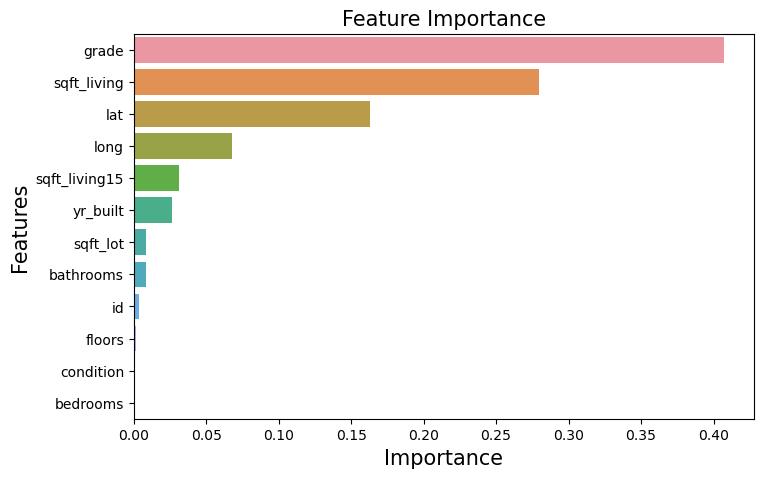

In [113]:
plt.rcParams['figure.figsize'] = 8,5
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Prediction Results and final Conclusion

* The grade and sqft_living is influencing the price feature mostly, so the price of a house is highly determined by the sqft of the living room

* Location has moderate influence.

* The criteria of floors, condition and bedrooms has no significant importance at all.